In [2]:
from serpentGenerator.functions.material import material
from serpentGenerator.functions.mix import mix
from serpentGenerator.functions.universe import universe
from serpentGenerator.functions.sqLattice import sqLat
from serpentGenerator.functions.cell import cell 
from serpentGenerator.functions.surf import surf 
from serpentGenerator.functions.pin import pin
from serpentGenerator.functions.builders import (buildHexLattice, buildPeripheralRing, buildBoundingBox, build3Dpin, buildPeripheralObject, buildStack, buildStackPlanes, build3DPinPlanes, buildSquareLattice)
from serpentGenerator.functions.utilities import (createDictFromConatinerList)
from serpentGenerator.data.materialLibrary import MATLIB
from serpentGenerator.functions.core import core

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

### General Python Tips
1. Press ``Shift + Tab`` over a function header to display documentation, press + to display full documentation
2. Using the ``vars(object)`` method will allow you to see all object attributes and values in a dictionary format
3. Using the ``object.toString()`` method will allow you to see the object in traditional serpent format, use this to guide yourself along the way.

### Sample demonstration of traditional pwr workflow
1. Check avialable mats in material library

In [2]:
MATLIB.keys()

dict_keys(['B', 'H2O', 'Reflector', 'UO2', 'Zr'])

In [12]:
### PWR fuelpin dimensions & materials
fuelRad = 0.4096
cladRad = 0.476

fpRadii = [fuelRad, cladRad]

fuelMat = MATLIB['UO2']
cladMat = MATLIB['Zr']
coolMat = MATLIB['H2O']

fpMats = [fuelMat, cladMat, coolMat]

print(vars(fuelMat))

print(fuelMat.toString())

{'id': 'UO2', 'isBurn': True, 'isModer': False, 'nuclides': [92235, 92238, 8016], 'fractions': [0.000815077056, 0.0221889771, 0.0460081082], 'dens': -10.5216, 'temp': None, 'xsLib': '09c', 'thermLib': None, 'color': None, 'rgb': None, 'modLib': ''}
mat UO2    -10.5216  burn 1  
92235.09c	0.000815077056
92238.09c	0.0221889771
8016.09c	0.0460081082




### Build Fuelpin
1. Different workflows between 2D and 3D, well start with 2D
2. Press shift+tab over a functionheader to reveal documentation

In [13]:
fp1 = pin("fp1", 3)
fp1.setPin(fpMats, fpRadii)

cp1 = pin("cp1", 1)
cp1.set('materials', [MATLIB['H2O']])

cp2 = cp1.duplicate("cp2")

print(fp1.toString())

pin fp1
UO2	0.4096
Zr	0.476
H2O




### Build Assembly
1. Use builtin builders to aid in creating a sqaure lattice for an assembly
2. Use builtin function which allow replicating and quick altering of universe objects

In [10]:
### PWR assembly dimensions & materials
pinPitch = 1.2623

In [14]:
fa1LatMap =  "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;\
              1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"

fa1UnivMap = {"1": fp1, '0': cp1} #0 denotes the outer univ for outerlayers
nOuter = 1

fa1 =  buildSquareLattice("fa1", fa1LatMap, fa1UnivMap, nOuter, pinPitch)



ca1 = fa1.duplicate("ca1")
ca1.replaceUniv(cp1, cp2)
ca1.replaceUniv(fp1, cp2)

print(fa1.toString())

lat fa1 1 0 0  19 19 1.2623
cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 cp1 
cp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 fp1 

### Build Active Core
1. Use similar workflow to build the active core

In [16]:
### PWR active core dimensions & materials
assemPitch = 21.6038
activeCoreRad = 83.4152
barrelRad = 103.4152 
thermalShieldRad  = 131.4152 
vesselRad = 151.4152

In [18]:
acLatMap =  "0 0 1 1 1 0 0;\
             0 1 1 1 1 1 0;\
             1 1 1 1 1 1 1;\
             1 1 1 1 1 1 1;\
             1 1 1 1 1 1 1;\
             0 1 1 1 1 1 0;\
             0 0 1 1 1 0 0"

acUnivMap = {"1": fa1, "0": ca1}

nOuter = 2

ac =  buildSquareLattice("ac", acLatMap, acUnivMap, nOuter, assemPitch)

print(ac.toString())

lat ac 1 0 0  11 11 21.6038
ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 
ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 
ca1 ca1 ca1 ca1 fa1 fa1 fa1 ca1 ca1 ca1 ca1 
ca1 ca1 ca1 fa1 fa1 fa1 fa1 fa1 ca1 ca1 ca1 
ca1 ca1 fa1 fa1 fa1 fa1 fa1 fa1 fa1 ca1 ca1 
ca1 ca1 fa1 fa1 fa1 fa1 fa1 fa1 fa1 ca1 ca1 
ca1 ca1 fa1 fa1 fa1 fa1 fa1 fa1 fa1 ca1 ca1 
ca1 ca1 ca1 fa1 fa1 fa1 fa1 fa1 ca1 ca1 ca1 
ca1 ca1 ca1 ca1 fa1 fa1 fa1 ca1 ca1 ca1 ca1 
ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 
ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 ca1 




### Build Housing 
1. Some useful builders exist to build the periphery of the active core

In [20]:
acCool = buildPeripheralRing(ac, activeCoreRad, material = MATLIB['H2O'], ringId = "acCool")
barrel = buildPeripheralRing(acCool, barrelRad, material = MATLIB['Zr'], ringId = "barrel")
therm  = buildPeripheralRing(barrel, thermalShieldRad, material = MATLIB['H2O'], ringId = "thermShield")
vess = buildPeripheralRing(therm, vesselRad, material = MATLIB['Zr'], ringId = "vessel")

box = buildBoundingBox(vess)

### Exporting to Serpent
1. The core object takes in the final universe and provides some functions for handling settings for the serpent input

In [22]:
pwr1 = core(box, "./serpent/pwr_test")
xsPath = r"/mnt/c/Users/user/Documents/endfb7/sss_endfb7u.xsdata"
pwr1.setSettings(geoType='2D', nps = 1E+05, nact = 100, nskip=100, xsAbsPath=xsPath, plotOptions=([3], 5000, [0], 1))
pwr1.toSerpent()

### SIMBA Ouput
1. SIMBA exports the output in 3 files, a .mat, .geo, and .main containing the materials, geometry, and settings respectively

In [11]:
with open('./serpent/pwr_test.mat', "r") as f:
    contents = f.read()
    print(contents)

mat H2O    -0.7    
1001.06c	0.66667
8016.06c	0.33333

mat UO2    -10.5216  burn 1  
92235.09c	0.000815077056
92238.09c	0.0221889771
8016.09c	0.0460081082

mat Zr    -6.55    
40090.06c	0.5145
40091.06c	0.1122
40092.06c	0.1715
40094.06c	0.1738
40096.06c	0.028




In [12]:
with open('./serpent/pwr_test.geo', "r") as f:
    contents = f.read()
    print(contents)

surf vesselcc1 cyl 0.0 0.0 151.4152 
surf putBorder rect -151.4152 151.4152 -151.4152 151.4152 
surf thermShieldcc1 cyl 0.0 0.0 131.4152 
surf barrelcc1 cyl 0.0 0.0 103.4152 
surf acCoolcc1 cyl 0.0 0.0 83.4152 
cell fillRegion 1  fill acCool_univbarrel_univthermShield_univvessel_univ -vesselcc1 
cell voidRegion 1  void vesselcc1 -putBorder 
cell acCool_univbarrel_univthermShield_univvessel_cell1 acCool_univbarrel_univthermShield_univvessel_univ  fill acCool_univbarrel_univthermShield_univ -thermShieldcc1 
cell acCool_univbarrel_univthermShield_univvessel_cell2 acCool_univbarrel_univthermShield_univvessel_univ  fill vessel_univ thermShieldcc1 -vesselcc1 
cell acCool_univbarrel_univthermShield_cell1 acCool_univbarrel_univthermShield_univ  fill acCool_univbarrel_univ -barrelcc1 
cell acCool_univbarrel_univthermShield_cell2 acCool_univbarrel_univthermShield_univ  fill thermShield_univ barrelcc1 -thermShieldcc1 
cell acCool_univbarrel_cell1 acCool_univbarrel_univ  fill acCool_univ -acCoolcc

In [13]:
with open('./serpent/pwr_test.main', "r") as f:
    contents = f.read()
    print(contents)

include ./serpent/pwr_test.mat
include ./serpent/pwr_test.geo
set bc 1 1 2
set pop 100000 100 100
set acelib "/mnt/c/Users/user/Documents/endfb7/sss_endfb7u.xsdata"
plot 31 5000 5000 0.0
set his 1



### Sample Plot

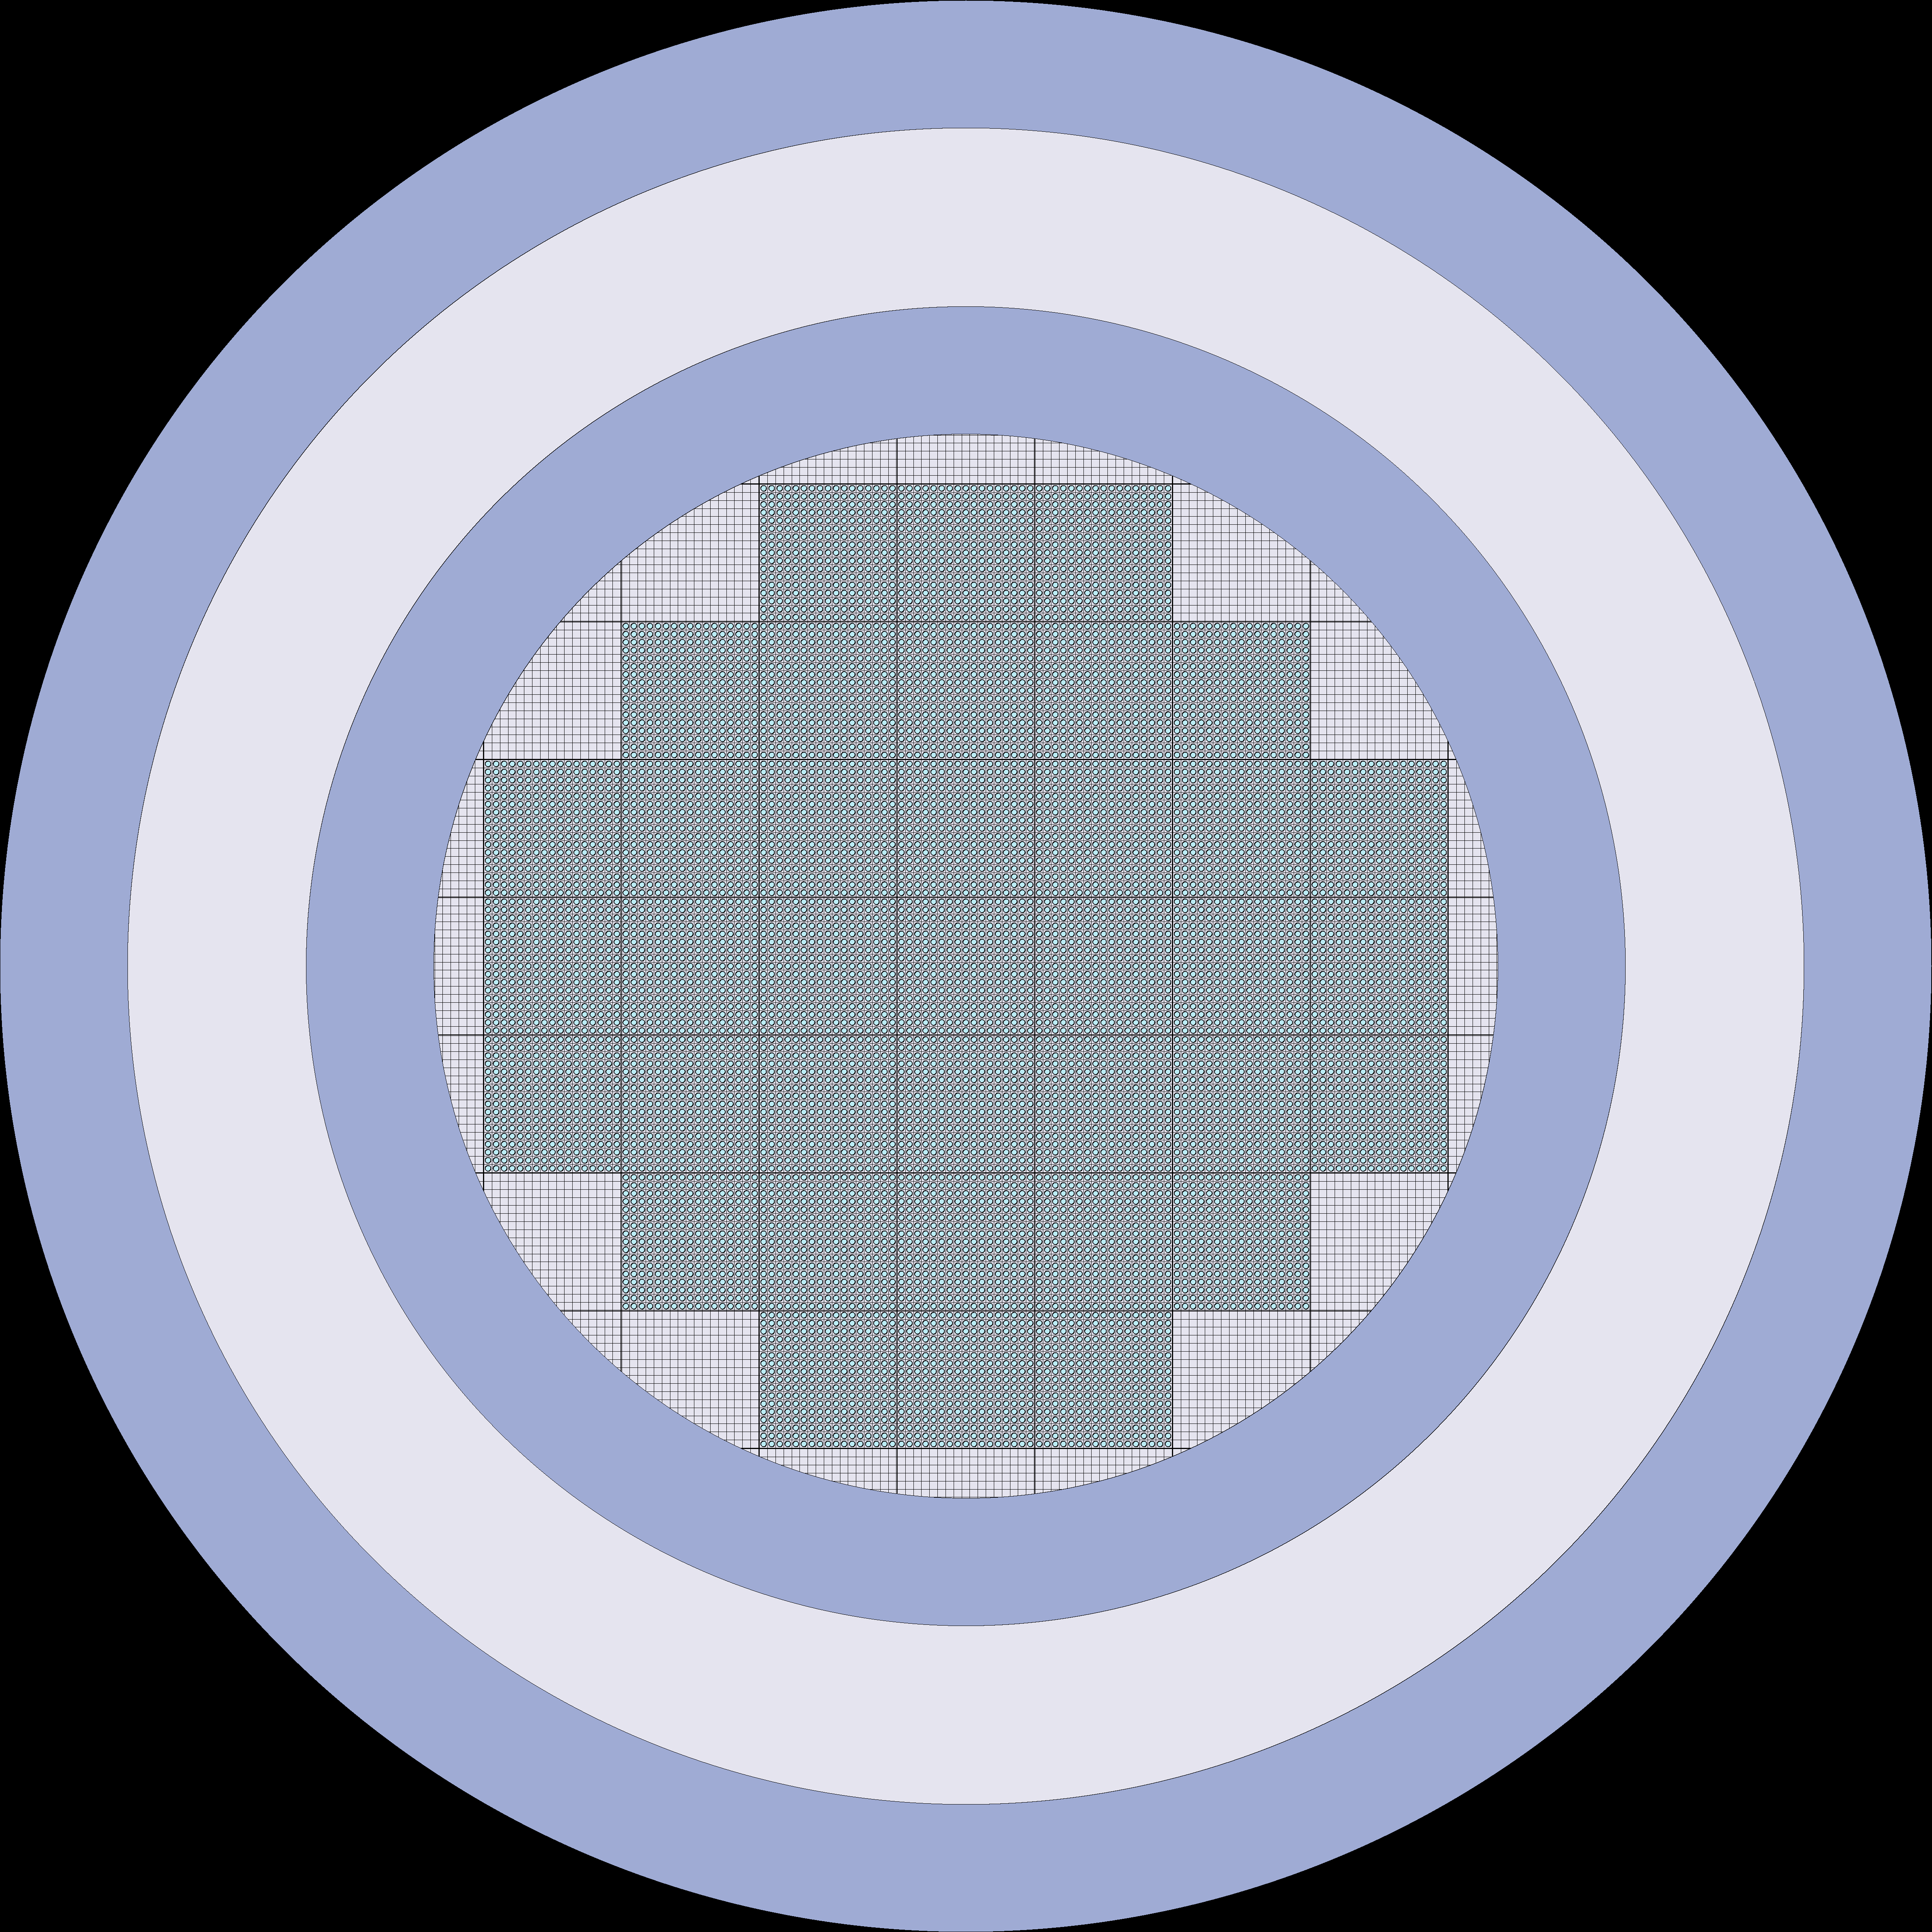

In [14]:
pwrImg = r'C:\Users\user\Documents\GitHub\SERPENT-INPUT-GENERATOR\serpentGenerator\examples\pwr_demo\serpent\pwr_test.main_geom1.png';
from IPython.display import Image
pwrDisp = Image(pwrImg,width=600, height=600)
display(pwrDisp)